In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Print the city count to confirm sufficient count.
len(cities)

597

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ae9e6194030296d5fb47be54eee110a9


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rio gallegos
Processing Record 2 of Set 1 | takoradi
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | yulara
Processing Record 6 of Set 1 | asfi
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | sibolga
Processing Record 9 of Set 1 | the valley
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | monrovia
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | grand river south east
City not found. Skipping...
Processin

Processing Record 35 of Set 4 | adre
Processing Record 36 of Set 4 | wattegama
Processing Record 37 of Set 4 | aasiaat
Processing Record 38 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 39 of Set 4 | qandala
Processing Record 40 of Set 4 | port-gentil
Processing Record 41 of Set 4 | jalu
Processing Record 42 of Set 4 | olinda
Processing Record 43 of Set 4 | sangar
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | pokosnoye
Processing Record 46 of Set 4 | nishihara
Processing Record 47 of Set 4 | labuhan
Processing Record 48 of Set 4 | emerald
Processing Record 49 of Set 4 | tiksi
Processing Record 50 of Set 4 | santa cruz cabralia
Processing Record 1 of Set 5 | grand gaube
Processing Record 2 of Set 5 | sorong
Processing Record 3 of Set 5 | klyuchi
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | ilhabela
Processing Record 7 of Set 5 | lhokseumawe
Processing Record 8 of Set 5 | iquitos

Processing Record 22 of Set 8 | presidencia roque saenz pena
Processing Record 23 of Set 8 | maniitsoq
Processing Record 24 of Set 8 | mumford
Processing Record 25 of Set 8 | toguchin
Processing Record 26 of Set 8 | nouadhibou
Processing Record 27 of Set 8 | nicoya
Processing Record 28 of Set 8 | tuatapere
Processing Record 29 of Set 8 | beauceville
Processing Record 30 of Set 8 | surt
Processing Record 31 of Set 8 | rumoi
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | yauya
Processing Record 34 of Set 8 | champerico
Processing Record 35 of Set 8 | suslonger
Processing Record 36 of Set 8 | oranjemund
Processing Record 37 of Set 8 | almiros
City not found. Skipping...
Processing Record 38 of Set 8 | pangoa
Processing Record 39 of Set 8 | cayenne
Processing Record 40 of Set 8 | brewster
Processing Record 41 of Set 8 | ambilobe
Processing Record 42 of Set 8 | verkhnyaya inta
Processing Record 43 of Set 8 | cairns
Processing Record 44 of Set 8 | tromso
Processing 

Processing Record 13 of Set 12 | zwedru
Processing Record 14 of Set 12 | puro
Processing Record 15 of Set 12 | san jeronimo
Processing Record 16 of Set 12 | nadym
Processing Record 17 of Set 12 | huoqiu
Processing Record 18 of Set 12 | uige
Processing Record 19 of Set 12 | mount hagen
Processing Record 20 of Set 12 | tagusao
Processing Record 21 of Set 12 | canberra
Processing Record 22 of Set 12 | yar-sale
Processing Record 23 of Set 12 | viedma
Processing Record 24 of Set 12 | mackay
Processing Record 25 of Set 12 | namatanai
Processing Record 26 of Set 12 | woodstock
Processing Record 27 of Set 12 | lena
Processing Record 28 of Set 12 | ostrovnoy
Processing Record 29 of Set 12 | isla mujeres
Processing Record 30 of Set 12 | mayo
Processing Record 31 of Set 12 | hwange
Processing Record 32 of Set 12 | port antonio
Processing Record 33 of Set 12 | alekseyevsk
Processing Record 34 of Set 12 | orje
Processing Record 35 of Set 12 | mehamn
Processing Record 36 of Set 12 | ormond beach
Pro

In [11]:
len(city_data)

547

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rio Gallegos,-51.6226,-69.2181,37.45,93,90,3.44,AR,2021-06-03 21:41:32
1,Takoradi,4.8845,-1.7554,80.13,85,36,8.10,GH,2021-06-03 21:43:26
2,Cape Town,-33.9258,18.4232,55.11,94,0,2.33,ZA,2021-06-03 21:38:41
3,Ushuaia,-54.8000,-68.3000,28.02,93,0,5.75,AR,2021-06-03 21:43:26
4,Yulara,-25.2406,130.9889,46.24,81,81,6.91,AU,2021-06-03 21:43:27
5,Asfi,32.2994,-9.2372,64.27,74,26,15.23,MA,2021-06-03 21:43:27
6,Bluff,-46.6000,168.3333,49.80,84,97,14.23,NZ,2021-06-03 21:38:58
7,Sibolga,1.7427,98.7792,77.25,90,100,2.48,ID,2021-06-03 21:43:28
8,The Valley,18.2170,-63.0578,84.06,74,20,12.66,AI,2021-06-03 21:43:28
9,Nikolskoye,59.7035,30.7861,60.69,82,20,4.72,RU,2021-06-03 21:43:28


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rio Gallegos,AR,2021-06-03 21:41:32,-51.6226,-69.2181,37.45,93,90,3.44
1,Takoradi,GH,2021-06-03 21:43:26,4.8845,-1.7554,80.13,85,36,8.10
2,Cape Town,ZA,2021-06-03 21:38:41,-33.9258,18.4232,55.11,94,0,2.33
3,Ushuaia,AR,2021-06-03 21:43:26,-54.8000,-68.3000,28.02,93,0,5.75
4,Yulara,AU,2021-06-03 21:43:27,-25.2406,130.9889,46.24,81,81,6.91
5,Asfi,MA,2021-06-03 21:43:27,32.2994,-9.2372,64.27,74,26,15.23
6,Bluff,NZ,2021-06-03 21:38:58,-46.6000,168.3333,49.80,84,97,14.23
7,Sibolga,ID,2021-06-03 21:43:28,1.7427,98.7792,77.25,90,100,2.48
8,The Valley,AI,2021-06-03 21:43:28,18.2170,-63.0578,84.06,74,20,12.66
9,Nikolskoye,RU,2021-06-03 21:43:28,59.7035,30.7861,60.69,82,20,4.72


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

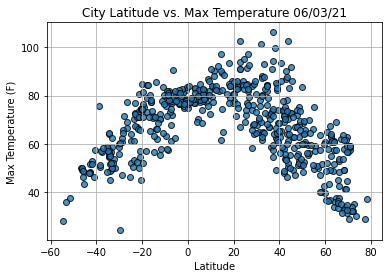

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

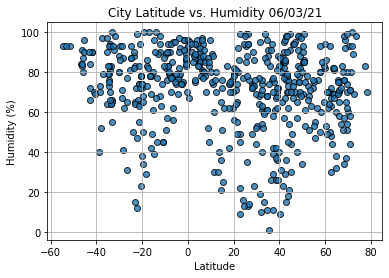

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

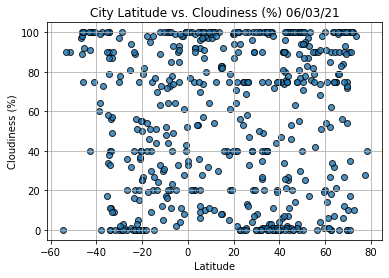

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

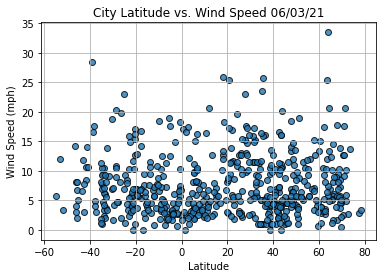

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()